# Assignment 4: Classification

Andrew Noonan

## Checking for and addressing missing values

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head(9)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

*Converting to the type that pandas believes is best to more easily do calculations*

In [5]:
df = df.convert_dtypes()

*I noticed that some of the values contained '3+' as dependents, and this was interfering with calculating the mean, so I dropped the plus sign*

In [6]:
df['Dependents'] = df['Dependents'].replace({'3+': '3'})

*I converted to a float, as I was going to replace missing values with the mean, and the mean wasn't going to be a mean*

In [7]:
df['Dependents'] = df['Dependents'].astype('float')

In [8]:
df['LoanAmount'] = df['LoanAmount'].astype('float')

In [9]:
df.dtypes

Loan_ID              string[python]
Gender               string[python]
Married              string[python]
Dependents                  float64
Education            string[python]
Self_Employed        string[python]
ApplicantIncome               Int64
CoapplicantIncome           Float64
LoanAmount                  float64
Loan_Amount_Term              Int64
Credit_History                Int64
Property_Area        string[python]
Loan_Status          string[python]
dtype: object

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

*For these variables, There isn't really a sensible way to input a mean or mode to replace missing values, so I just dropped them*

In [11]:
df = df.dropna(subset=['Gender', 'Married', 'Self_Employed'])

In [12]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

*For Dependents, I thought the best choice would be to input the mean number of dependents into missing values, since the values of 0,1,2,3 aren't a classification, but rather the actual number of dependents*

In [13]:
df['Dependents'].fillna(df['Dependents'].mean(), inplace=True)

/tmp/ipykernel_1744/1154994514.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mean(), inplace=True)


*I filled in the mode for Loan_Amount_Term, because 360 was very common, and I wanted to keep the calculations as Ints*

In [14]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

/tmp/ipykernel_1744/289206775.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)


In [15]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term      0
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df['Credit_History'].describe()

count       523.0
mean     0.837476
std      0.369284
min           0.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Credit_History, dtype: Float64

*Here I used mode because a Decimal value has no value , where as 1 and 0 do*

In [17]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

/tmp/ipykernel_1744/1608471621.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [18]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

/tmp/ipykernel_1744/1977403596.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


In [20]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

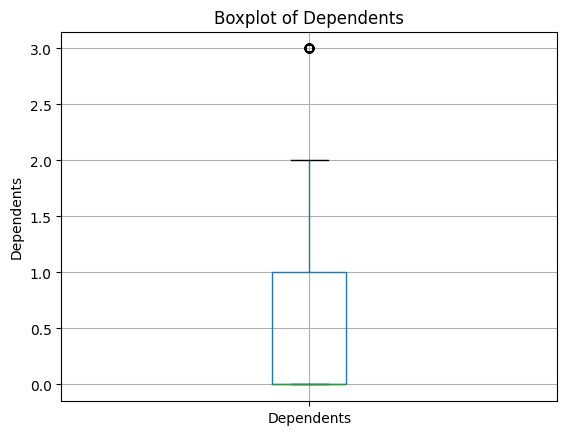

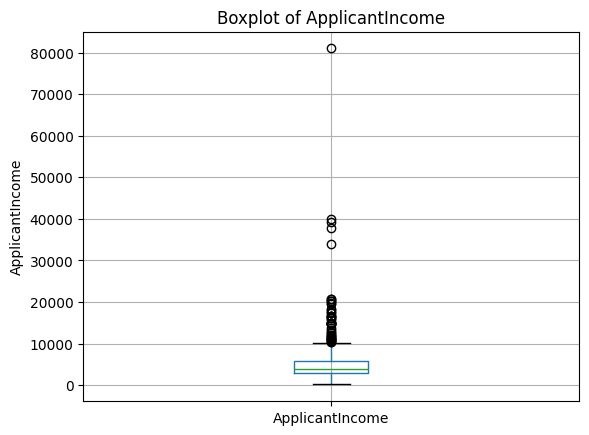

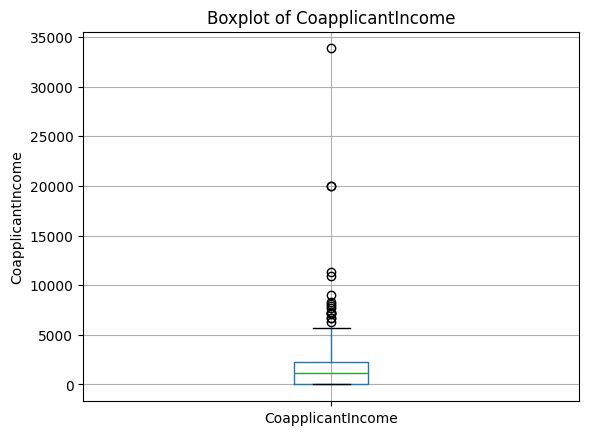

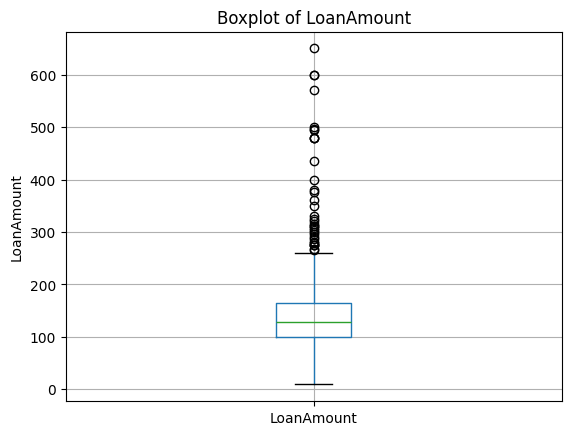

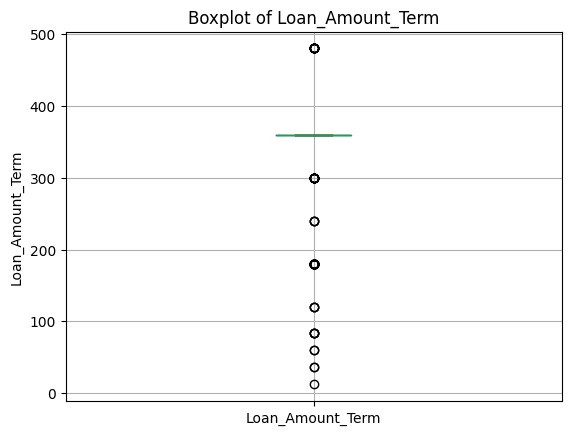

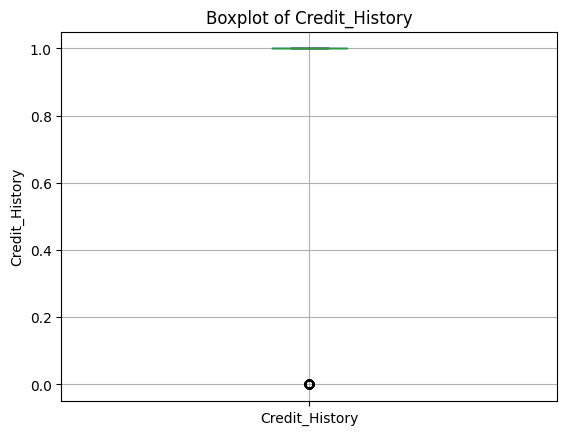

In [21]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()  # Create a new figure for each column
    df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

**As you can see from the boxplots, almost every numeric variables is highly skewed, however almost all of them appear to be valid values in the dataset, so I do not believe they should be dropped**

<Figure size 640x480 with 0 Axes>

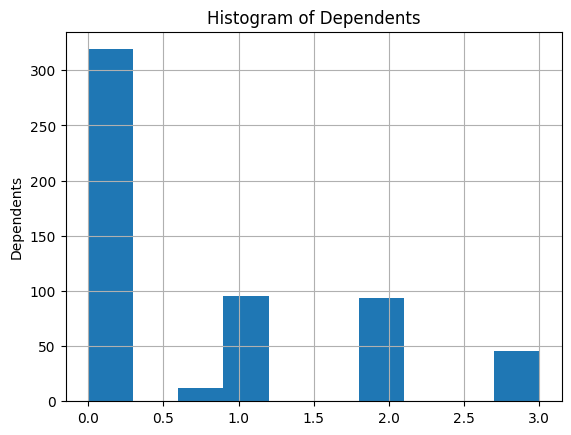

<Figure size 640x480 with 0 Axes>

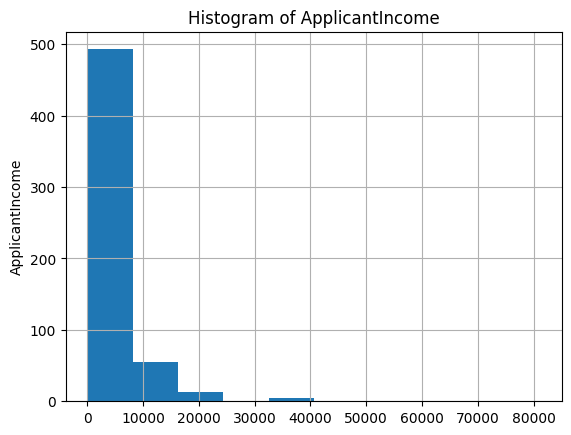

<Figure size 640x480 with 0 Axes>

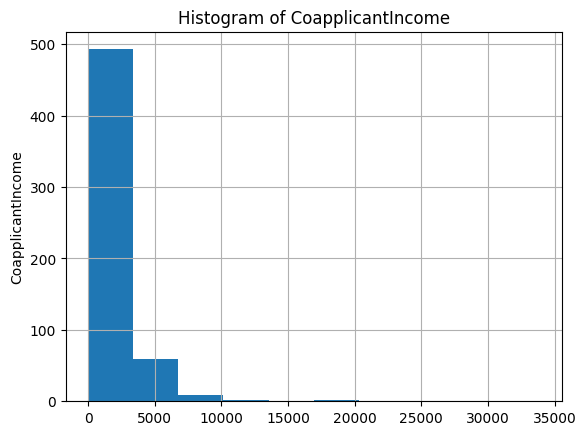

<Figure size 640x480 with 0 Axes>

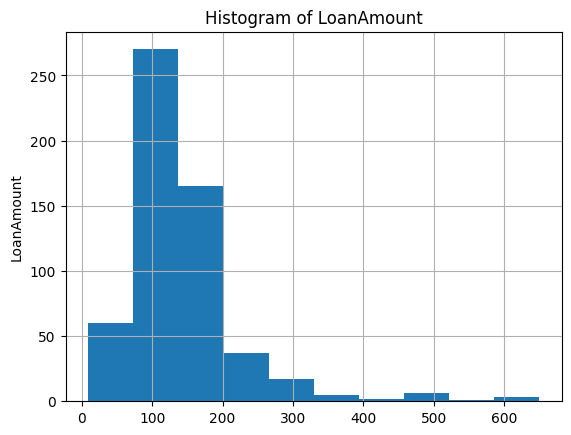

<Figure size 640x480 with 0 Axes>

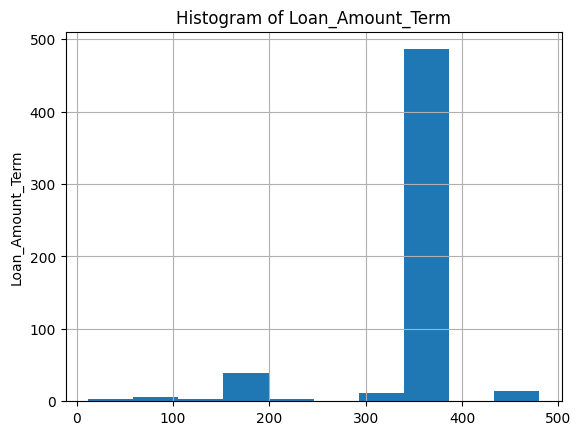

<Figure size 640x480 with 0 Axes>

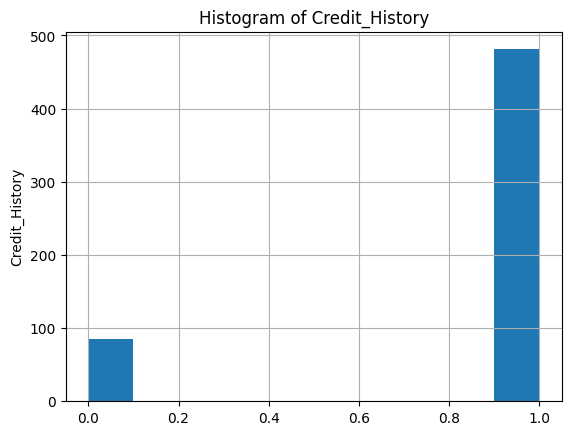

In [22]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()  # Create a new figure for each column
    df.hist(column=[col])
    plt.title(f'Histogram of {col}')
    plt.ylabel(col)
    plt.show()

## Centering/Scaling Data

In [23]:
df_num = df.select_dtypes(include=np.number)

In [24]:
df_num.drop('Credit_History', axis=1, inplace=True)

In [25]:
df_num.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.0,5849,0.0,144.472527,360
1,1.0,4583,1508.0,128.000000,360
2,0.0,3000,0.0,66.000000,360
3,0.0,2583,2358.0,120.000000,360
4,0.0,6000,0.0,141.000000,360


In [26]:
colmeans = df_num.sum()/df_num.shape[0]
colmeans

Dependents              0.759928
ApplicantIncome      5259.971731
CoapplicantIncome    1579.146502
LoanAmount            144.472527
Loan_Amount_Term      342.614841
dtype: Float64

In [27]:
centered_df = df_num - colmeans
centered_df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,5.660000e+02,566.0,566.0,5.660000e+02,566.0
mean,-8.787631e-17,-0.0,0.0,-1.406021e-15,0.0
std,1.000062e+00,5412.901682,2507.243865,8.042007e+01,64.753994
min,-7.599278e-01,-5109.971731,-1579.146502,-1.354725e+02,-330.614841
25%,-7.599278e-01,-2382.471731,-1579.146502,-4.447253e+01,17.385159
50%,-7.599278e-01,-1420.471731,-430.146502,-1.647253e+01,17.385159
75%,2.400722e-01,551.278269,718.103498,2.052747e+01,17.385159
max,2.240072e+00,75740.028269,32257.853498,5.055275e+02,137.385159


<Figure size 640x480 with 0 Axes>

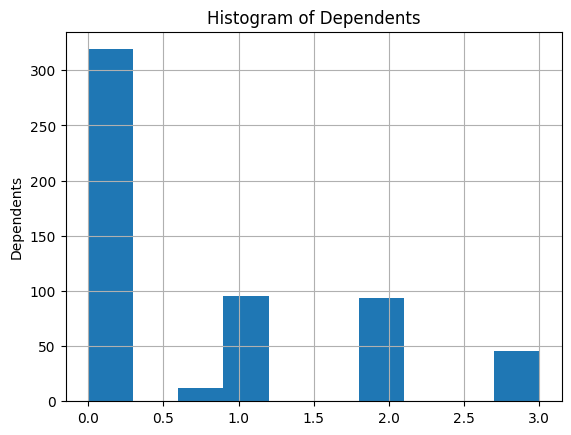

<Figure size 640x480 with 0 Axes>

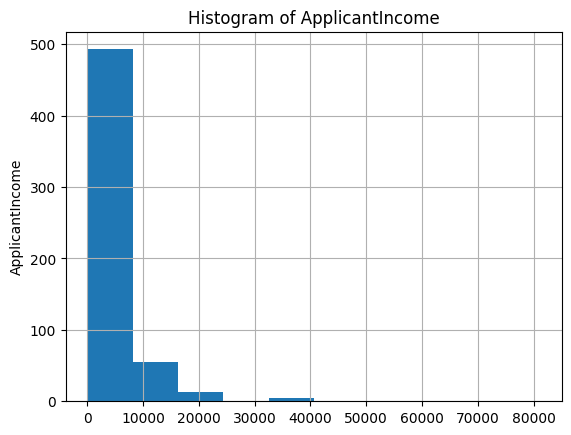

<Figure size 640x480 with 0 Axes>

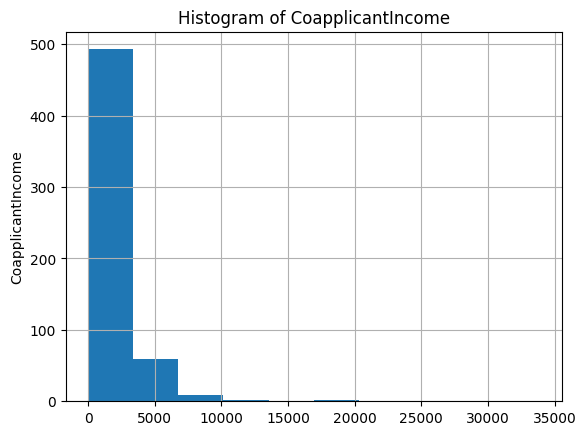

<Figure size 640x480 with 0 Axes>

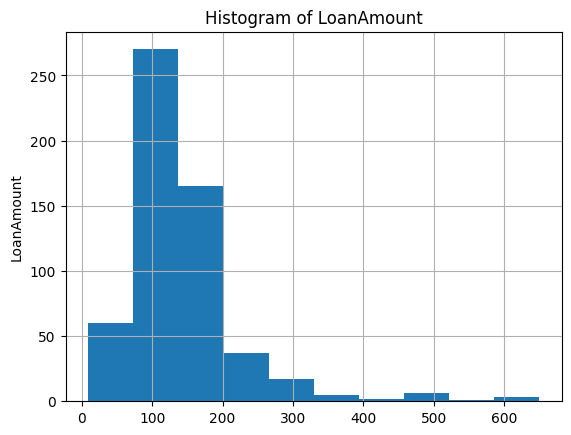

<Figure size 640x480 with 0 Axes>

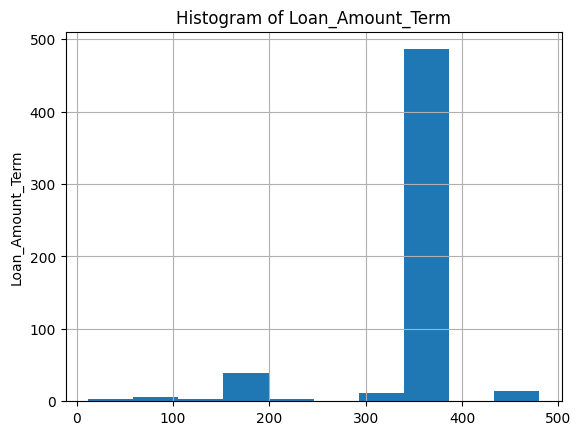

In [28]:
for col in centered_df.columns:
    plt.figure()  # Create a new figure for each column
    df.hist(column=[col])
    plt.title(f'Histogram of {col}')
    plt.ylabel(col)
    plt.show()

In [29]:
column_deviations = df_num.std(axis=0)

In [30]:
centered_and_scaled_df = centered_df/column_deviations

In [31]:
centered_and_scaled_df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,5.660000e+02,566.0,566.0,5.660000e+02,566.0
mean,-4.393816e-17,-0.0,0.0,-1.883064e-17,0.0
std,1.000000e+00,1.0,1.0,1.000000e+00,1.0
min,-7.598805e-01,-0.944036,-0.629834,-1.684561e+00,-5.105706
25%,-7.598805e-01,-0.440147,-0.629834,-5.530028e-01,0.26848
50%,-7.598805e-01,-0.262423,-0.171561,-2.048310e-01,0.26848
75%,2.400572e-01,0.101845,0.286412,2.552531e-01,0.26848
max,2.239933e+00,13.9925,12.865862,6.286086e+00,2.121648


<Figure size 640x480 with 0 Axes>

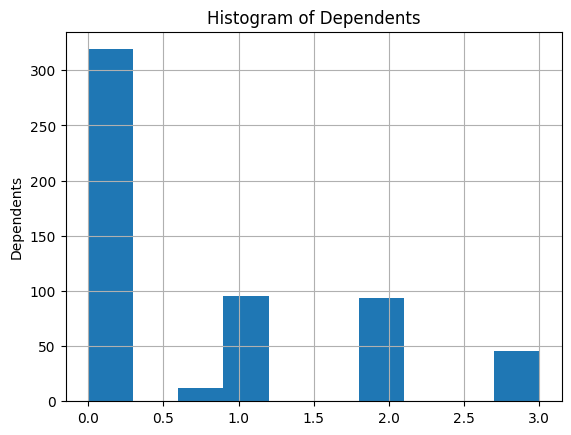

<Figure size 640x480 with 0 Axes>

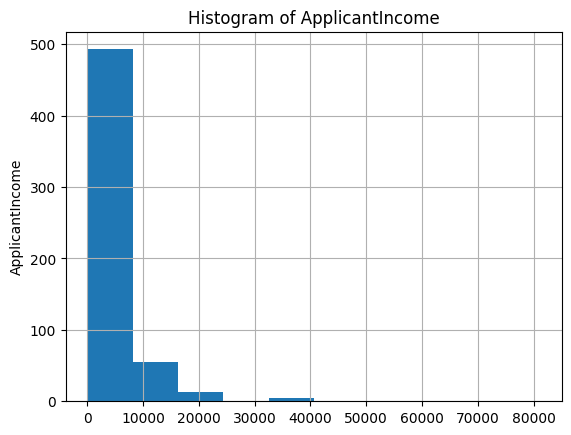

<Figure size 640x480 with 0 Axes>

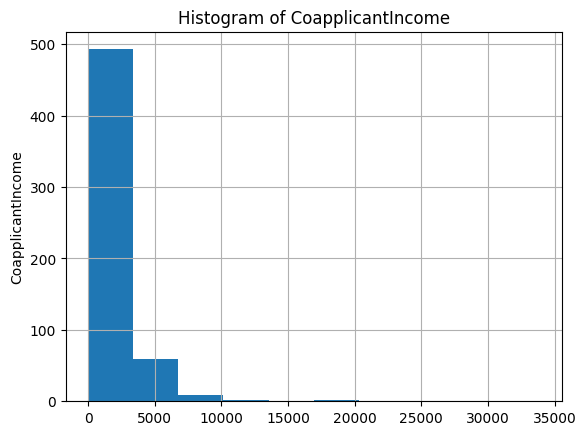

<Figure size 640x480 with 0 Axes>

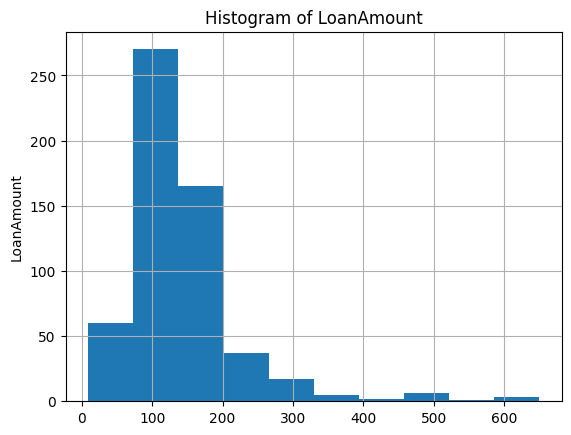

<Figure size 640x480 with 0 Axes>

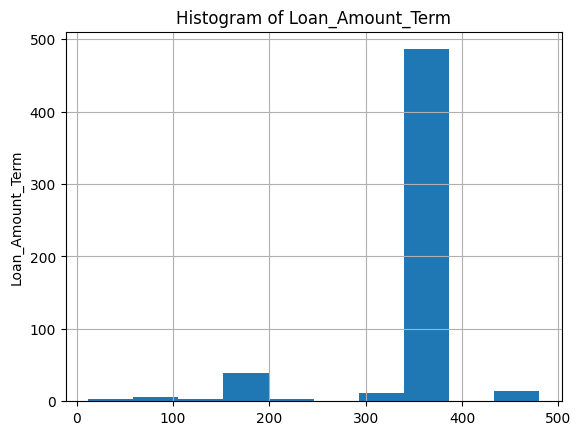

In [32]:
for col in centered_and_scaled_df.columns:
    plt.figure()  
    df.hist(column=[col])
    plt.title(f'Histogram of {col}')
    plt.ylabel(col)
    plt.show()

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,144.472527,360,1,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360,1,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360,1,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360,1,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360,1,Urban,Y


In [34]:
centered_and_scaled_df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,-0.759880,0.108819,-0.629834,0.000000,0.26848
1,0.240057,-0.125066,-0.028376,-0.204831,0.26848
2,-0.759880,-0.417516,-0.629834,-0.975783,0.26848
3,-0.759880,-0.494554,0.310641,-0.304309,0.26848
4,-0.759880,0.136716,-0.629834,-0.043180,0.26848


In [35]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,144.472527,360,1,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360,1,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360,1,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360,1,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360,1,Urban,Y


In [36]:
df.dtypes

Loan_ID              string[python]
Gender               string[python]
Married              string[python]
Dependents                  float64
Education            string[python]
Self_Employed        string[python]
ApplicantIncome               Int64
CoapplicantIncome           Float64
LoanAmount                  float64
Loan_Amount_Term              Int64
Credit_History                Int64
Property_Area        string[python]
Loan_Status          string[python]
dtype: object

In [37]:
centered_and_scaled_df.dtypes

Dependents           float64
ApplicantIncome      Float64
CoapplicantIncome    Float64
LoanAmount           float64
Loan_Amount_Term     Float64
dtype: object

In [38]:
df['ApplicantIncome'] = df['ApplicantIncome'].astype('float')


In [39]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('float')

In [40]:
df['Credit_History'] = df['Credit_History'].astype('float')

In [41]:
df.dtypes

Loan_ID              string[python]
Gender               string[python]
Married              string[python]
Dependents                  float64
Education            string[python]
Self_Employed        string[python]
ApplicantIncome             float64
CoapplicantIncome           Float64
LoanAmount                  float64
Loan_Amount_Term            float64
Credit_History              float64
Property_Area        string[python]
Loan_Status          string[python]
dtype: object

In [42]:
df.update(centered_and_scaled_df)

In [43]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,-0.759880,Graduate,No,0.108819,-0.629834,0.000000,0.26848,1.0,Urban,Y
1,LP001003,Male,Yes,0.240057,Graduate,No,-0.125066,-0.028376,-0.204831,0.26848,1.0,Rural,N
2,LP001005,Male,Yes,-0.759880,Graduate,Yes,-0.417516,-0.629834,-0.975783,0.26848,1.0,Urban,Y
3,LP001006,Male,Yes,-0.759880,Not Graduate,No,-0.494554,0.310641,-0.304309,0.26848,1.0,Urban,Y
4,LP001008,Male,No,-0.759880,Graduate,No,0.136716,-0.629834,-0.043180,0.26848,1.0,Urban,Y


### Transforming
*After scaling the data, it is still fairly skewed. As such, I will try applying a square root transformation to remedy this*

In [44]:
transformed = (centered_and_scaled_df+1).apply(np.log)

<Figure size 640x480 with 0 Axes>

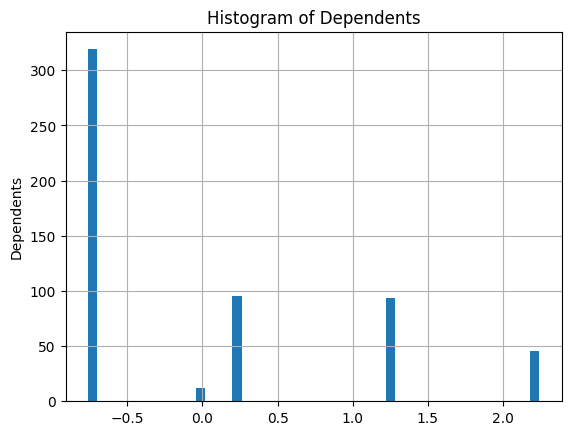

<Figure size 640x480 with 0 Axes>

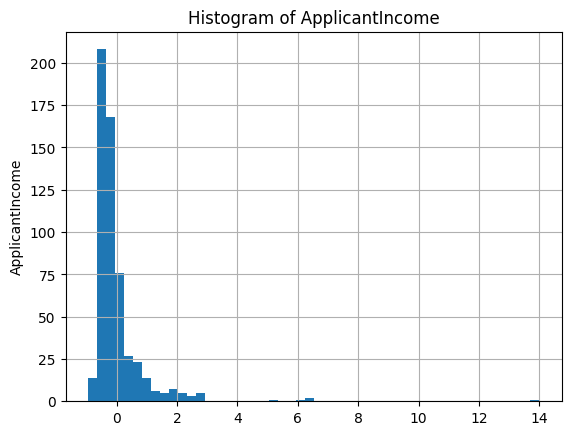

<Figure size 640x480 with 0 Axes>

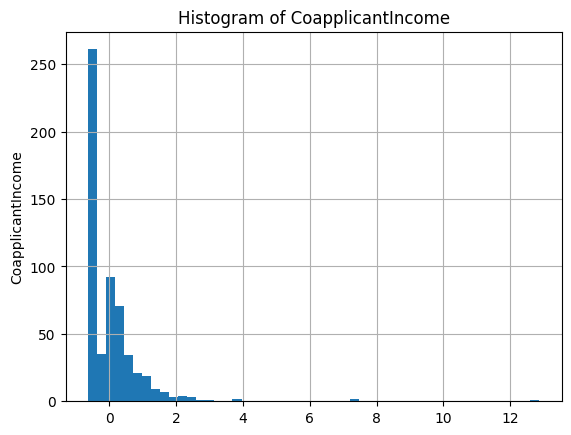

<Figure size 640x480 with 0 Axes>

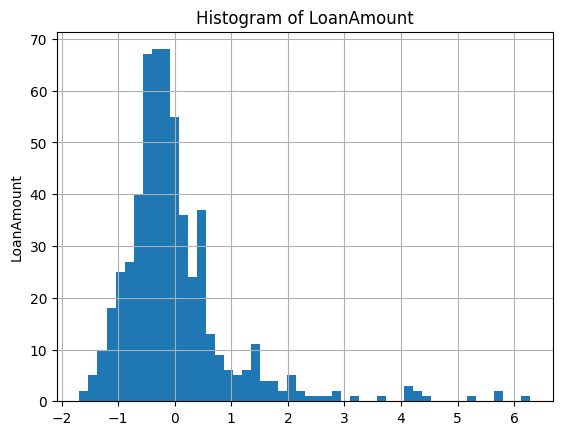

<Figure size 640x480 with 0 Axes>

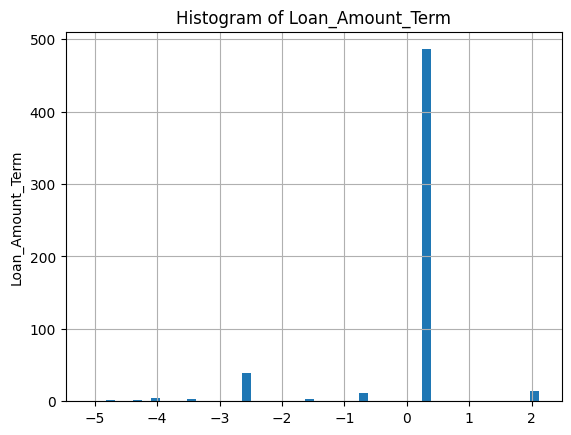

In [45]:
for col in transformed.columns:
    plt.figure()  
    df.hist(column=[col],bins=50)
    plt.title(f'Histogram of {col}')
    plt.ylabel(col)
    plt.show()

In [46]:
df.update(transformed)

In [47]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,-1.426618,Graduate,No,0.103296,-0.993803,0.000000,0.237819,1.0,Urban,Y
1,LP001003,Male,Yes,0.215158,Graduate,No,-0.133607,-0.028787,-0.229201,0.237819,1.0,Rural,N
2,LP001005,Male,Yes,-1.426618,Graduate,Yes,-0.540453,-0.993803,-3.720695,0.237819,1.0,Urban,Y
3,LP001006,Male,Yes,-1.426618,Not Graduate,No,-0.682314,0.270517,-0.362849,0.237819,1.0,Urban,Y
4,LP001008,Male,No,-1.426618,Graduate,No,0.128143,-0.993803,-0.044140,0.237819,1.0,Urban,Y


*While still not perfect, the quantitative data looks more normal than when we started*

In [48]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,566.000000,566.000000,566.0,566.000000,512.000000,566.000000
mean,-0.538458,-0.212232,-0.284715,-0.314704,0.231715,0.849823
std,1.042666,0.586299,0.718443,0.902816,0.250093,0.357561
min,-1.426618,-2.883039,-0.993803,-4.441147,-1.073248,0.000000
25%,-1.426618,-0.580081,-0.993803,-0.805203,0.237819,1.000000
50%,-1.426618,-0.304387,-0.18825,-0.229201,0.237819,1.000000
75%,0.215158,0.096986,0.251853,0.227337,0.237819,1.000000
max,1.175553,2.707550,2.62943,1.985966,1.138361,1.000000


In [49]:
Income_labels = ['Below_Average_Income', 'Above_Average_Income']
ApplicantIncome_bins = [-2.883039,-0.304387,2.707550]
CoapplicantIncome_bins = [-0.993803,-0.18825,2.62943 ]
df['ApplicantIncome'] = pd.cut(df['ApplicantIncome'], bins=ApplicantIncome_bins, labels=Income_labels, include_lowest=True)

In [50]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,-1.426618,Graduate,No,Above_Average_Income,-0.993803,0.000000,0.237819,1.0,Urban,Y
1,LP001003,Male,Yes,0.215158,Graduate,No,Above_Average_Income,-0.028787,-0.229201,0.237819,1.0,Rural,N
2,LP001005,Male,Yes,-1.426618,Graduate,Yes,Below_Average_Income,-0.993803,-3.720695,0.237819,1.0,Urban,Y
3,LP001006,Male,Yes,-1.426618,Not Graduate,No,Below_Average_Income,0.270517,-0.362849,0.237819,1.0,Urban,Y
4,LP001008,Male,No,-1.426618,Graduate,No,Above_Average_Income,-0.993803,-0.044140,0.237819,1.0,Urban,Y


In [51]:
df['CoapplicantIncome'] = pd.cut(df['CoapplicantIncome'], bins=CoapplicantIncome_bins, labels=Income_labels, include_lowest=True)

In [52]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,-1.426618,Graduate,No,Above_Average_Income,Below_Average_Income,0.000000,0.237819,1.0,Urban,Y
1,LP001003,Male,Yes,0.215158,Graduate,No,Above_Average_Income,Above_Average_Income,-0.229201,0.237819,1.0,Rural,N
2,LP001005,Male,Yes,-1.426618,Graduate,Yes,Below_Average_Income,Below_Average_Income,-3.720695,0.237819,1.0,Urban,Y
3,LP001006,Male,Yes,-1.426618,Not Graduate,No,Below_Average_Income,Above_Average_Income,-0.362849,0.237819,1.0,Urban,Y
4,LP001008,Male,No,-1.426618,Graduate,No,Above_Average_Income,Below_Average_Income,-0.044140,0.237819,1.0,Urban,Y


In [53]:
LoanAmount_labels = ['LowLoanAmount', 'HighLoanAmount']
Loan_Amount_Term_labels = ['ShortTermLoan', 'LongTermLoan']
LoanAmount_bins=[-4.441147, -0.229201, 1.985966]
LoanTerm_bins=[-1.073248,0.237819, 1.138361]
df['LoanAmount'] = pd.cut(df['LoanAmount'], bins=LoanAmount_bins, labels=LoanAmount_labels, include_lowest=True)
df['Loan_Amount_Term'] = pd.cut(df['Loan_Amount_Term'], bins=LoanTerm_bins, labels=Loan_Amount_Term_labels, include_lowest=True)

In [54]:
Credit_History_labels= ['Bad_Credit', 'Good_Credit']
Credit_History_bins = [0,0.99,1]
df['Credit_History'] = pd.cut(df['Credit_History'], bins=Credit_History_bins, labels=Credit_History_labels, include_lowest=True)

In [55]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,-1.426618,Graduate,No,Above_Average_Income,Below_Average_Income,HighLoanAmount,LongTermLoan,Good_Credit,Urban,Y
1,LP001003,Male,Yes,0.215158,Graduate,No,Above_Average_Income,Above_Average_Income,HighLoanAmount,LongTermLoan,Good_Credit,Rural,N
2,LP001005,Male,Yes,-1.426618,Graduate,Yes,Below_Average_Income,Below_Average_Income,LowLoanAmount,LongTermLoan,Good_Credit,Urban,Y
3,LP001006,Male,Yes,-1.426618,Not Graduate,No,Below_Average_Income,Above_Average_Income,LowLoanAmount,LongTermLoan,Good_Credit,Urban,Y
4,LP001008,Male,No,-1.426618,Graduate,No,Above_Average_Income,Below_Average_Income,HighLoanAmount,LongTermLoan,Good_Credit,Urban,Y


### Features to use as predictors
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Credit_History
I believe that these four features make sense as predictors, because Applicants and Coapplicants with higher income are more likely to be able to pay the loan back. I think loan amount makes sense as well, because you should be more cautious when giving higher loan amounts. Lastly, A good credit history shows that you pay your debts, and as such are a lower risk for lenders.
**To avoid overfitting, I am going to exclude all other features, because they seem relatively superfluous when determining if someone should be eligible for a loan or not. While Education likely would result in a higher purchasing power, we already know the income of the applicants**

In [56]:
df_encoded = df.copy()

In [57]:
df_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,-1.426618,Graduate,No,Above_Average_Income,Below_Average_Income,HighLoanAmount,LongTermLoan,Good_Credit,Urban,Y
1,LP001003,Male,Yes,0.215158,Graduate,No,Above_Average_Income,Above_Average_Income,HighLoanAmount,LongTermLoan,Good_Credit,Rural,N
2,LP001005,Male,Yes,-1.426618,Graduate,Yes,Below_Average_Income,Below_Average_Income,LowLoanAmount,LongTermLoan,Good_Credit,Urban,Y
3,LP001006,Male,Yes,-1.426618,Not Graduate,No,Below_Average_Income,Above_Average_Income,LowLoanAmount,LongTermLoan,Good_Credit,Urban,Y
4,LP001008,Male,No,-1.426618,Graduate,No,Above_Average_Income,Below_Average_Income,HighLoanAmount,LongTermLoan,Good_Credit,Urban,Y


In [58]:
df_encoded.drop(columns={'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'}, inplace=True)
df_encoded.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,Above_Average_Income,Below_Average_Income,HighLoanAmount,LongTermLoan,Good_Credit,Y
1,LP001003,Above_Average_Income,Above_Average_Income,HighLoanAmount,LongTermLoan,Good_Credit,N
2,LP001005,Below_Average_Income,Below_Average_Income,LowLoanAmount,LongTermLoan,Good_Credit,Y
3,LP001006,Below_Average_Income,Above_Average_Income,LowLoanAmount,LongTermLoan,Good_Credit,Y
4,LP001008,Above_Average_Income,Below_Average_Income,HighLoanAmount,LongTermLoan,Good_Credit,Y


In [59]:

def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        new_col_name = col + '_le'
        df[new_col_name] = col_values_transformed
        



In [60]:
label_encode(df_encoded, df_encoded.columns.values)
target = df_encoded[['Loan_Status']]
label_encode(target, target.columns.values)

/tmp/ipykernel_1744/484431313.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col_name] = col_values_transformed


In [61]:
features = df_encoded[['ApplicantIncome_le', 'CoapplicantIncome_le', 'LoanAmount_le', 'Credit_History_le']]
target = target[['Loan_Status_le']]

In [62]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 10)

In [63]:
nb = GaussianNB()
nb.fit(features_train, target_train)
target_pred = nb.predict(features_test)
target_pred


NameError: name 'GaussianNB' is not defined